## Resampling for imbalanced datasets

In the predictive modelling contexts, imbalanced data refers to the situation when the distribution of target variable Y is highly skewed.

It is a common problem in classification tasks, when the classes are not represented equally. For example, when building models such as  fraud detection, loan default, spam detection, the number of examples available for positive classes are usually  way lower  than negative classes.

Imbalanced dataset is problematic because the learning by learning algorithms will be biased towards the overly represented class. A machine learning algorithm learns by trying to make fewer mistakes: since there are fewer examples in one class, it tends to focus on not making mistakes in the overly represented class. In a fraud detection task fraught with large number of negative examples, the learning algorithm might try very hard to be right with all examples in negative class that defeats our primary purpose.

There are some recommended ways of dealing with imbalanced data especially during model training and evaluation such as weighted training, penalizing model with adjusted cost function, and selecting metrics insensitive to class imbalance. We will cover those in Week 11 lecture of the best practices in machine learning.

Here, we will discuss easy to implement resampling techniques to balance dataset before training a model.


There are two main approaches to even-up classes in an imbalanced data:

<ul><li> **Oversampling:** Increase the number of instances from the under-represented class ( sampling with replancement<ul><li> _Disadvantage_ : It can lead to overfitting (doing will with the model data but no so with the future dataset)</ul></ul>
<ul><li> **Undersampling:** Remove instances from the over-represented class, called under-sampling.<ul><li> _Disadvantage_ : It can cause loss of information. </ul></ul>

Pandas DataFrame.sample method can be used to sample randomly either the majority or minority class.
    

Some Rules of Thumb
Consider testing under-sampling when you have an a lot data (tens- or hundreds of thousands of instances or more)
Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)
Consider testing random and non-random (e.g. stratified) sampling schemes.
Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)    


In [25]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10)

In [26]:
df = pd.DataFrame(X)
df['Y'] = y

In [27]:

df_0 = df[df.Y == 0]
df_1 = df[df.Y == 1]

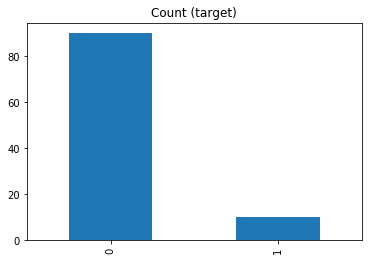

In [28]:
df.Y.value_counts().plot(kind='bar', title='Count (target)');

### Under sampling

In [30]:
df_0_under = df_0.sample(len(df_1))
df_under = pd.concat([df_0_under, df_1], axis=0)


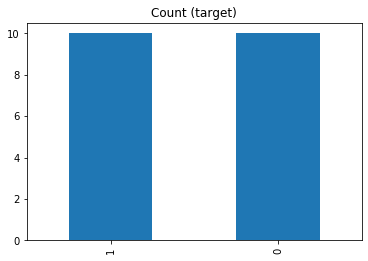

In [32]:
df_under.Y.value_counts().plot(kind='bar', title='Count (target)');

In [35]:
df_1_over = df_1.sample(len(df_0), replace=True)
df_over = pd.concat([df_0, df_1_over], axis=0)

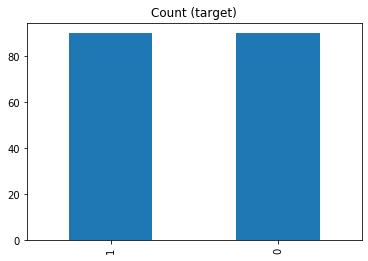

In [36]:
df_over.Y.value_counts().plot(kind='bar', title='Count (target)');


https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets